<a href="https://colab.research.google.com/github/hackesh8218/Green-Warriors/blob/main/Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv("placement.csv")

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


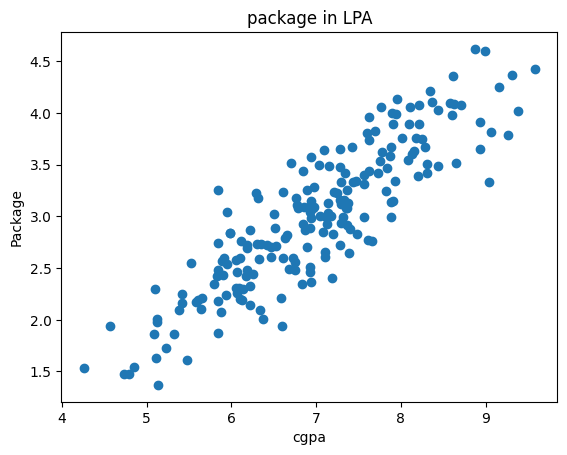

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel("Package")
plt.title("package in LPA")
plt.show()

In [ ]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]


In [ ]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [ ]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)
# here we are trainingb themy my data set for 20 dataset and random stATE IS NOTMPRE IT IS ONLY 2


LinearRegression()

In [ ]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [ ]:
# Now we are ready to predict
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [ ]:
# lr.predict(X_test.iloc[0])
# above is showing error because we trained our model with 2 d dataset
#  so we use 2d
lr.predict(X_test.iloc[0].values.reshape(1,1))
# Now we can see our model is predicting that if student have cgpa 8.18 (1) then
# package should be 3.89111(4.10 is real package ) LPA hoga
# Which is different from actual package
# Now we can say that my algorithm is going so well
# lets check for 2nd cgpa package


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [ ]:
lr.predict(X_train.iloc[1].values.reshape(1,1))
# 7.15 cgpa --real package is 3.49 and model is saying thta the pavkage is
#  3.89 LPA
#  BAhut sahi rsults nhi aa arhe hain abhi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.0863992])

In [ ]:
lr.predict(X_train.iloc[2].values.reshape(1,1))
# cgpa 5.88 real Package is 2.08 and model package is 2.12

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.12798777])

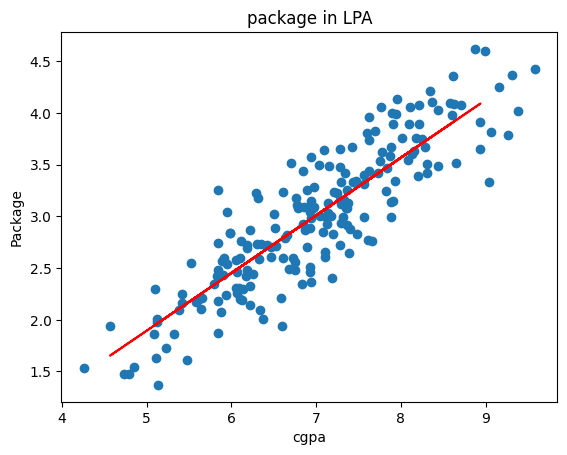

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_test,lr.predict(X_test),color='red')
plt.xlabel('cgpa')
plt.ylabel("Package")
plt.title("package in LPA")
plt.show()

In [ ]:
# Now find m and c
m=lr.coef_
m

array([0.55795197])

In [ ]:
b=lr.intercept_
b

np.float64(-0.8961119222429144)

In [ ]:
# y=mx+b
y=m*8.58+b
y

array([3.89111601])

In [ ]:
m*9.5+b

array([4.40443183])

In [ ]:
m*100+b
# there is no restriction for the limit of x
#  m is basically weightage
# if b=0 then package  =m*cgpa


array([54.89908542])

In [ ]:
#  finding the value of m and b
# 1.-> Closed form solution -> ordinary least square(direct formula) --> not useful for higher dimension
# 2.->Non close form solution -> gradient descent  --> SGD regression
# focus using OLS
# b=y(bar)-mX(bar)
# m=summation of((x-x(bar)(y-y(bar))/summation of((x-x)(bar))ka whole sqaure))


For linear regression notes

https://drive.google.com/file/d/18oSjN8aEztz_m-_CoKb5i_kGHvKccjdp/view

In [ ]:
class MeraLR:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):

            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))

        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)

    def predict(self,X_test):

        print(X_test)

        return self.m * X_test + self.b

In [ ]:
df.head()


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
X=df.iloc[:,0].values
y=df.iloc[:,1].values
X
#  cgpa value

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [ ]:
y
# packagevalue

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape

(160,)

In [ ]:
lr=MeraLR()

In [ ]:
lr.fit(X_train,y_train)

0.5579519734250721
-0.8961119222429152


In [ ]:
X_test[0]

np.float64(8.58)

In [ ]:
lr.predict(X_test[0])

8.58


np.float64(3.891116009744203)

Efficiency of regression


1.Mean Absolute Error
2.Mean Square Error
3.Root Mean Square Error
4.R2 Score - Coef of determination
5, Adjusted R2 score

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=lr.predict(X_test)
y_pred

[8.58 7.15 5.88 6.22 4.57 4.79 5.32 6.86 8.35 6.87 8.94 7.9  6.93 5.91
 7.32 7.82 5.09 7.42 6.94 7.73 6.19 7.28 6.73 7.2  8.21 6.75 7.87 7.6
 8.63 5.12 8.15 7.36 8.31 6.6  6.59 7.47 7.93 6.29 6.37 6.47]


array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [ ]:
 y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))
# 0.28 LPA ka error kar raha hai ye model

MAE 0.2884710931878174


In [ ]:
print("MSE",mean_squared_error(y_test,y_pred))
# not in lpa

MSE 0.12129235313495523


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
#  in lpa

RMSE 0.3482705171773161


In [ ]:
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.7807301475103842


In [ ]:
r2=r2_score(y_test,y_pred)
n=X_test.shape[0]
p=1 #only one column we have that s cgpa
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2


0.7749598882343417

In [ ]:
print("Adjusted R2 score",adjusted_r2)

Adjusted R2 score 0.7749598882343417


In [ ]:
new_df1=df.copy()
new_df1['random_feature']=np.random.random(200)

new_df1=new_df1[['cgpa','random_feature','package']]
new_df1.head()



,cgpa,random_feature,package
0,6.89,0.291319,3.26
1,5.12,0.586000,1.98
2,7.82,0.985407,3.25
3,7.42,0.210915,3.67
4,6.94,0.366953,3.57


Text(0.5, 1.0, 'Package VS Random Feature')

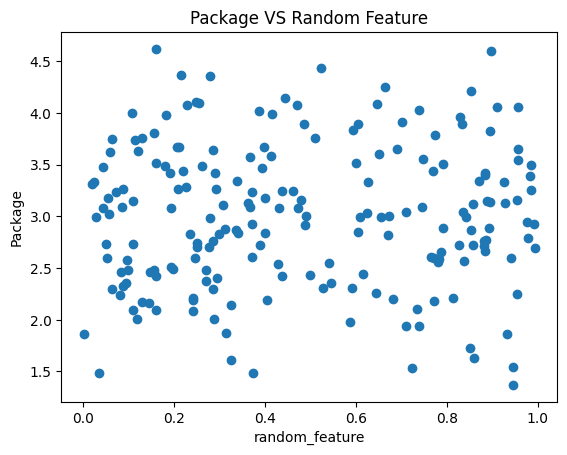

In [ ]:
 plt.scatter(new_df1['random_feature'],new_df1['package'])
 plt.xlabel('random_feature')
 plt.ylabel("Package")
 plt.title("Package VS Random Feature")